# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [2]:
# Preview the dataset
data.head(20)

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

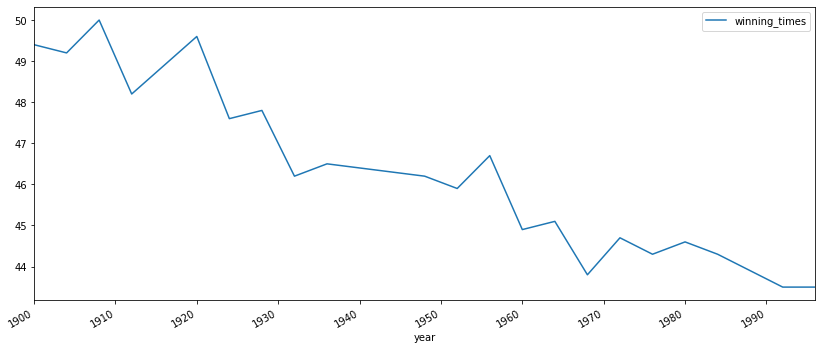

In [3]:
# Plot the time series
data.plot(figsize=(14,6))

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff.dropna(inplace=True)

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

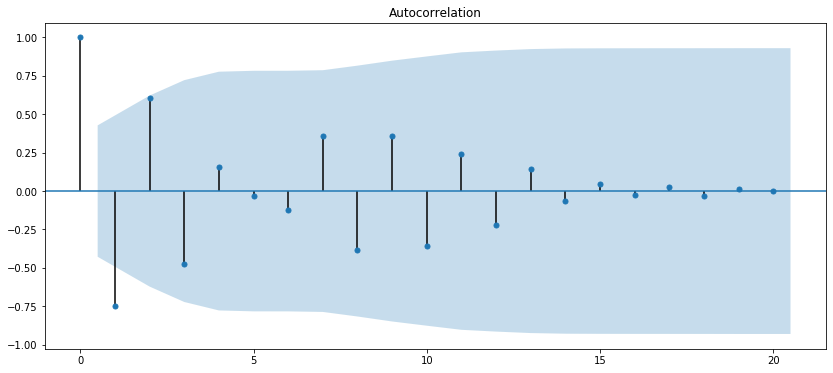

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(14,6))
plot_acf(data_diff, ax=ax, lags=20);

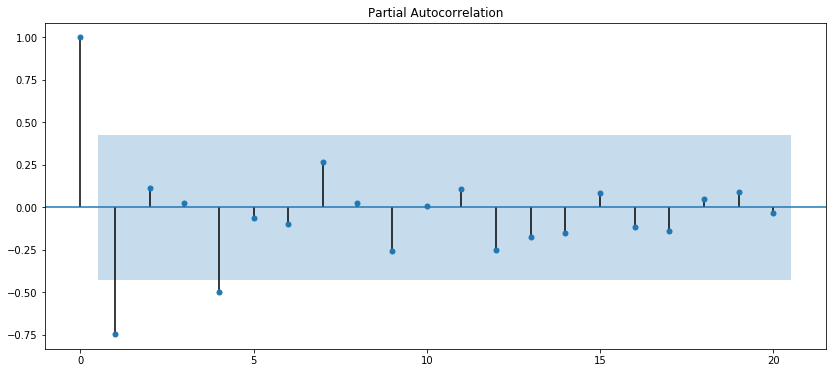

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(14,6))
plot_pacf(data_diff, ax=ax, lags=20, method='ywm');

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

ar_model = ARMA(data_diff, order=(1,0))
res_ar = ar_model.fit()
print(res_ar.summary())
print(res_ar.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Mon, 07 Dec 2020   AIC                             46.107
Time:                        18:29:00   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [9]:
ma_model = ARMA(data_diff, order=(0,1))
res_ma = ma_model.fit()
print(res_ma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Mon, 07 Dec 2020   AIC                             51.308
Time:                        18:30:33   BIC                             54.442
Sample:                             0   HQIC                            51.988
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/s

In [10]:
arma_model = ARMA(data_diff, order=(1,1))
res_arma = arma_model.fit()
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Mon, 07 Dec 2020   AIC                             47.916
Time:                        18:31:11   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
arma_model2 = ARMA(data_diff, order=(2,1))
res_arma2 = arma_model2.fit()
print(res_arma2.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Tue, 08 Dec 2020   AIC                             47.911
Time:                        13:26:29   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


## What is your final model? Why did you pick this model?

In [8]:
# Your comments here
#Either ARMA(1,0) or ARMA(2, 1). They both have parameters that are statistically significant. We need to decide
#if we would minimize AIC or BIC to make a final selection. Generally, we might want to pick a model with fewer 
#parameters

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 